In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

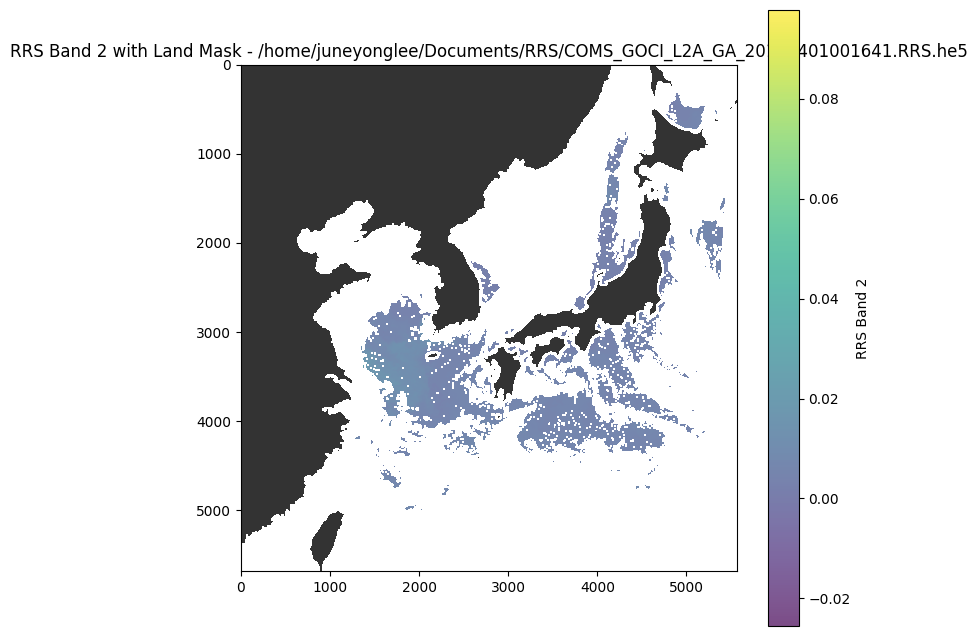

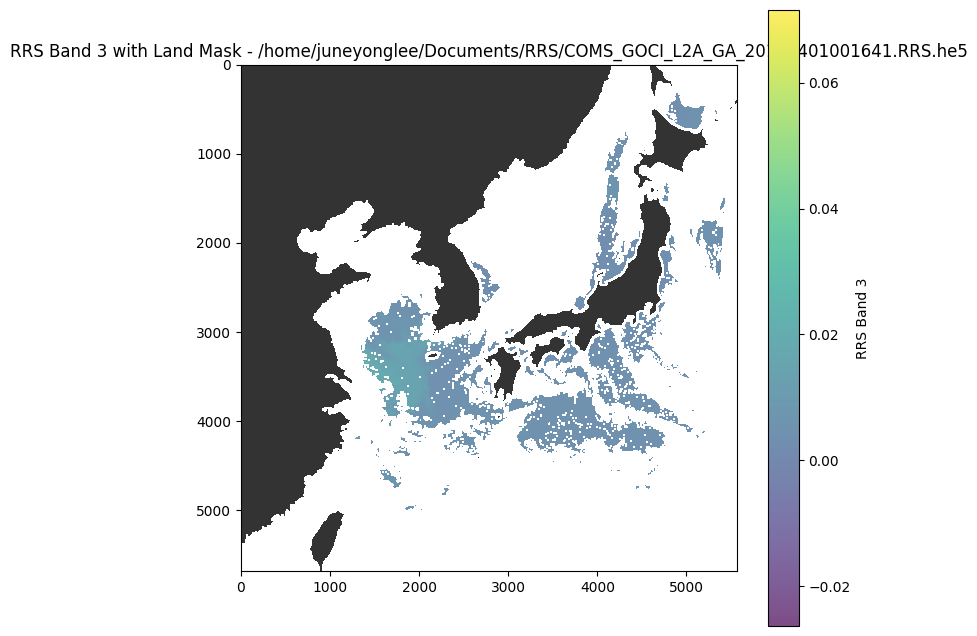

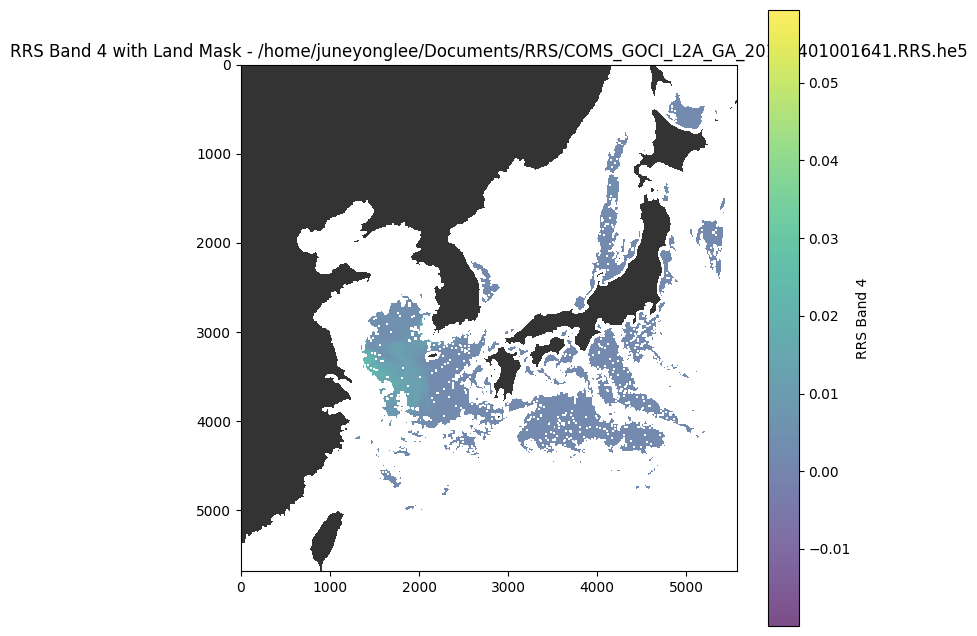

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# RRS 파일 경로 및 육지/바다 npy 파일 경로
file_path = '/home/juneyonglee/Documents/RRS/COMS_GOCI_L2A_GA_20110401001641.RRS.he5'
land_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI.npy'

# 사용할 밴드 리스트 (2, 3, 4번 밴드 예시)
band_lst = [2, 3, 4]

# 특정 범위의 좌표 설정 (필요에 따라 지정할 수 있습니다. 여기서는 전체 범위를 사용)
# 범위를 설정하지 않으면 데이터 전체를 사용합니다.
y_min, y_max = 0, None
x_min, x_max = 0, None

def display_rrs_with_land_mask(file_path, land_mask_path, band_lst, y_min=None, y_max=None, x_min=None, x_max=None):
    # 육지/바다 마스크 불러오기
    land_mask = np.load(land_mask_path)

    # netCDF 파일 열기
    try:
        f = nc.Dataset(file_path, 'r')
    except:
        print(f"Failed to open file: {file_path}")
        return

    # 각 밴드에 대해 데이터 읽고 시각화
    for band in band_lst:
        try:
            # netCDF 형식으로 데이터를 읽음
            rrs_data = f['HDFEOS']['GRIDS']['Image Data']['Data Fields']['Band ' + str(band) + ' RRS Image Pixel Values']
        except KeyError:
            print(f"Band {band} not found in file {file_path}")
            continue

        # numpy 배열로 변환
        np_rrs = np.array(rrs_data)

        # 지정된 좌표 범위 내 데이터만 선택
        np_rrs = np_rrs[y_min:y_max, x_min:x_max]

        # 육지 마스크도 동일한 범위로 자르기
        land_mask_cropped = land_mask[y_min:y_max, x_min:x_max]

        # 결측치를 처리 (보통 -999.0 값을 결측치로 가정)
        np_rrs = np.where(np_rrs == -999.0, np.nan, np_rrs)

        # 이미지 출력
        plt.figure(figsize=(8, 8))

        # RRS 데이터 이미지
        plt.imshow(np_rrs, cmap='viridis', alpha=0.7)
        plt.colorbar(label=f'RRS Band {band}')

        # 육지 마스크를 빨간색으로 강조 (land_mask가 1이면 육지, 0이면 바다라고 가정)
        plt.imshow(np.ma.masked_where(land_mask_cropped == 0, land_mask_cropped), cmap=ListedColormap(['black', 'white']), alpha=0.8)

        plt.title(f'RRS Band {band} with Land Mask - {file_path}')
        plt.show()

    # 파일 닫기
    f.close()

# 밴드별로 RRS 데이터와 육지 마스크 함께 시각화
display_rrs_with_land_mask(file_path, land_mask_path, band_lst, y_min, y_max, x_min, x_max)


Band 2 unique values: [-9.9900000e+02 -2.5540330e-02 -2.3389757e-02 ...  5.0626244e-02
  9.7815126e-02            nan]
Band 2 data type: float32
Band 2 has data type: float32


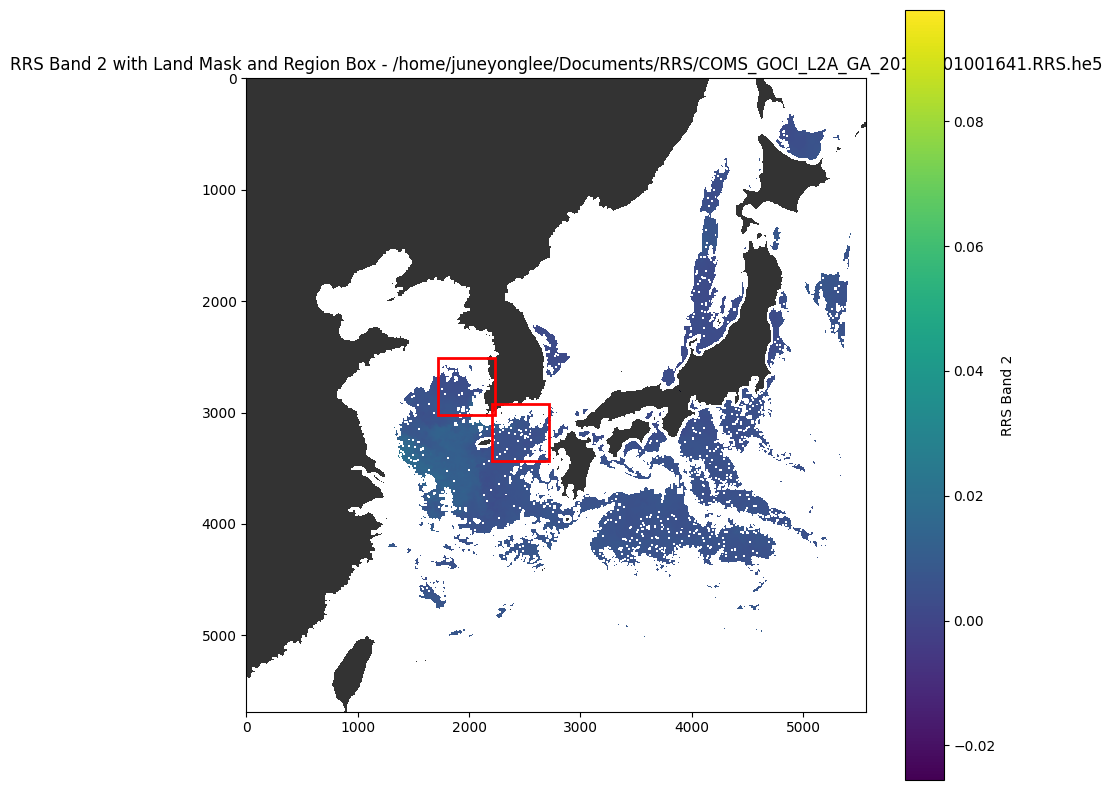

Band 3 unique values: [-9.9900000e+02 -2.6318939e-02 -2.5868699e-02 ...  4.9201962e-02
  7.1533538e-02            nan]
Band 3 data type: float32
Band 3 has data type: float32


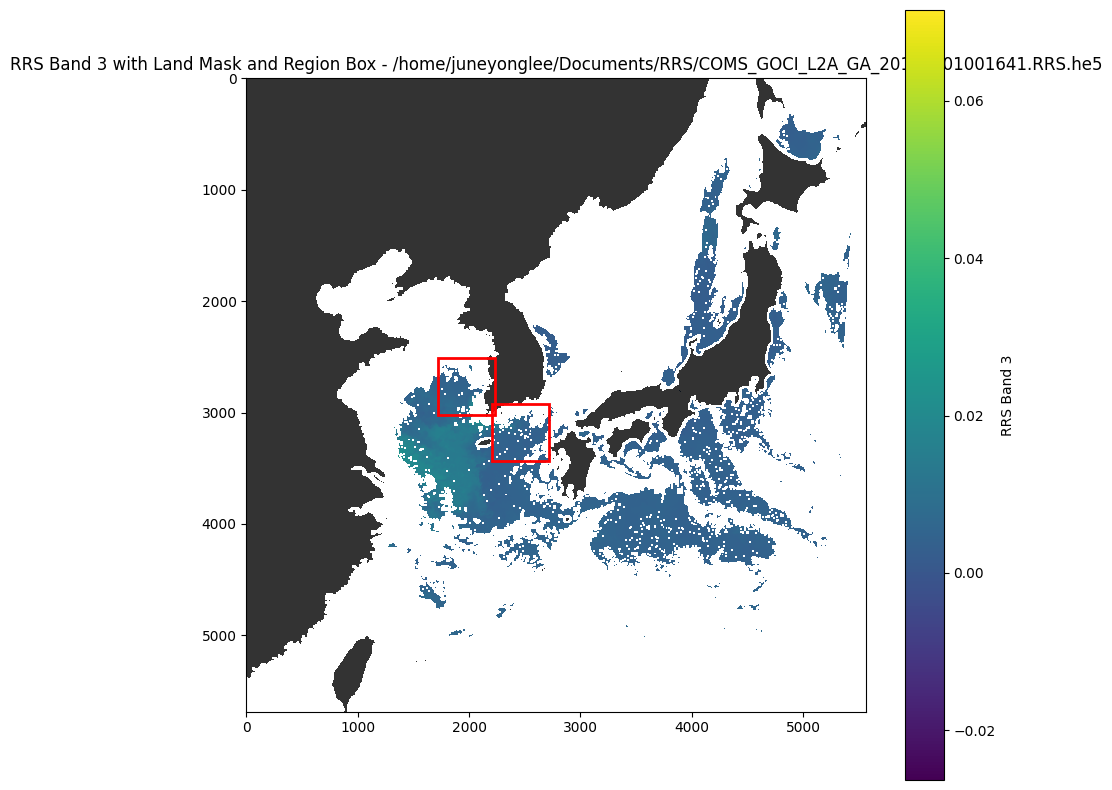

Band 4 unique values: [-9.9900000e+02 -1.9909916e-02 -1.9639613e-02 ...  3.6565781e-02
  3.7591778e-02  5.9344467e-02]
Band 4 data type: float32
Band 4 has data type: float32


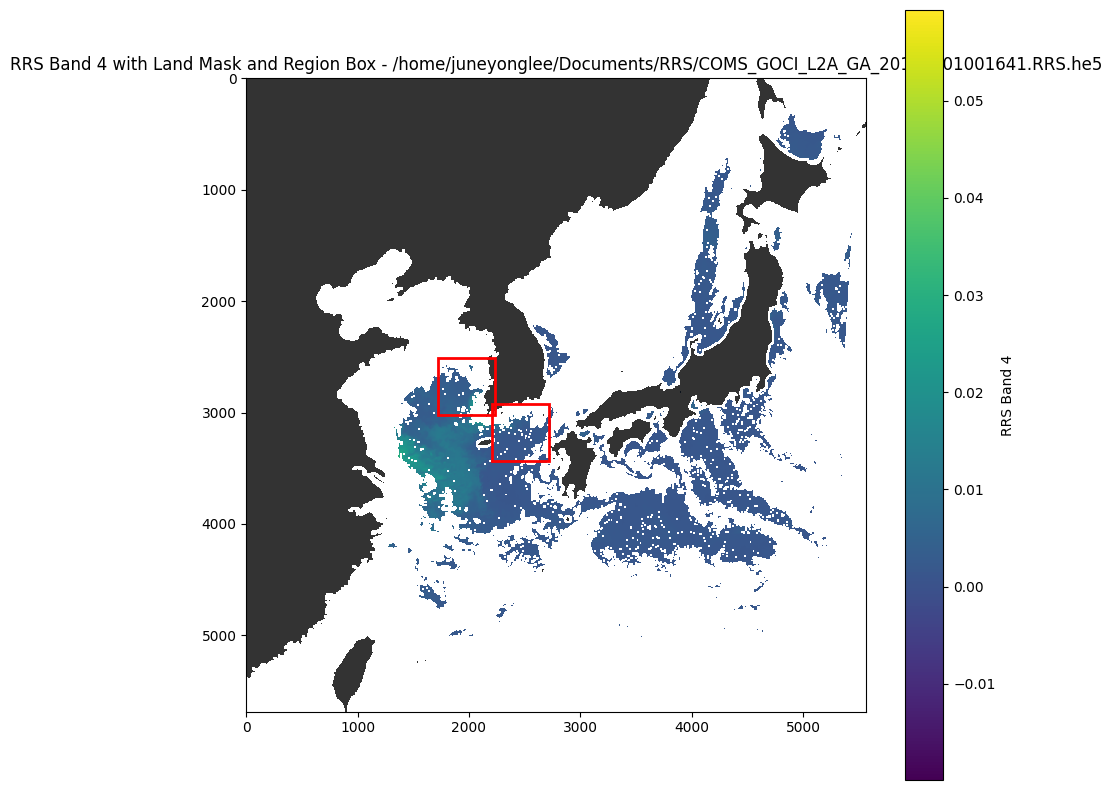

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap

# RRS 파일 경로 및 육지/바다 npy 파일 경로
file_path = '/home/juneyonglee/Documents/RRS/COMS_GOCI_L2A_GA_20110401001641.RRS.he5'

land_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI.npy'

# 사용할 밴드 리스트 (2, 3, 4번 밴드 예시)
band_lst = [2, 3, 4]

# Define the patch size and region coordinates
patch_size = 512

# # 낙동강 좌표 설정 (픽셀 좌표, 중간좌표 기준)
# region1_x_min, region1_x_max = 2336, 2592
# region1_y_min, region1_y_max = 3053, 3309
# # 새만금 좌표 설정 (픽셀 좌표, 중간좌표 기준)
# region2_x_min, region2_x_max = 1851, 2107
# region2_y_min, region2_y_max = 2639, 2895

# Nakdong coordinates  (2464,3181)
region1_center_x, region1_center_y = (2336 + 2592) // 2, (3053 + 3309) // 2
# Saemangeum coordinates (1979, 2767)
region2_center_x, region2_center_y = (1851 + 2107) // 2, (2639 + 2895) // 2

# Calculate the top-left coordinates for the 512x512 patches (2208,2925) (2720,3437)
region1_x_min, region1_y_min = region1_center_x - patch_size // 2, region1_center_y - patch_size // 2
region1_x_max, region1_y_max = region1_center_x + patch_size // 2, region1_center_y + patch_size // 2
#                                                            (1979,2511)  (2235,3023)
region2_x_min, region2_y_min = region2_center_x - patch_size // 2, region2_center_y - patch_size // 2
region2_x_max, region2_y_max = region2_center_x + patch_size // 2, region2_center_y + patch_size // 2

def display_rrs_with_land_mask_and_box(file_path, land_mask_path, band_lst, region1_x_min, region1_x_max, region1_y_min, region1_y_max, region2_x_min, region2_x_max, region2_y_min, region2_y_max):
    # 육지/바다 마스크 불러오기
    land_mask = np.load(land_mask_path)

    # netCDF 파일 열기
    try:
        f = nc.Dataset(file_path, 'r')
    except:
        print(f"Failed to open file: {file_path}")
        return

    # 각 밴드에 대해 데이터 읽고 시각화
    for band in band_lst:
        try:
            # netCDF 형식으로 데이터를 읽음
            rrs_data = f['HDFEOS']['GRIDS']['Image Data']['Data Fields']['Band ' + str(band) + ' RRS Image Pixel Values']
        except KeyError:
            print(f"Band {band} not found in file {file_path}")
            continue

        # numpy 배열로 변환
        np_rrs = np.array(rrs_data)

        # 고유값 출력
        unique_values = np.unique(np_rrs)
        print(f"Band {band} unique values: {unique_values}")

        # 데이터 유형 확인 (8비트 또는 16비트)
        data_type = np_rrs.dtype
        print(f"Band {band} data type: {data_type}")

        # 데이터가 8비트인지 16비트인지 확인
        if data_type == np.uint8:
            print(f"Band {band} is 8-bit data.")
        elif data_type == np.uint16:
            print(f"Band {band} is 16-bit data.")
        else:
            print(f"Band {band} has data type: {data_type}")

        # 육지 마스크 크기 맞추기 (전체 범위로)
        land_mask_cropped = land_mask[:np_rrs.shape[0], :np_rrs.shape[1]]

        # 결측치를 처리 (보통 -999.0 값을 결측치로 가정)
        np_rrs = np.where(np_rrs == -999.0, np.nan, np_rrs)

        # 이미지 출력
        plt.figure(figsize=(10, 10))

        # RRS 데이터 이미지
        plt.imshow(np_rrs, cmap='viridis', alpha=1)
        plt.colorbar(label=f'RRS Band {band}')

        # 육지 마스크를 빨간색으로 강조 (land_mask가 1이면 육지, 0이면 바다라고 가정)
        plt.imshow(np.ma.masked_where(land_mask_cropped == 0, land_mask_cropped), cmap=ListedColormap(['black', 'white']), alpha=0.8)

        # 낙동강 좌표 범위에 빨간색 사각형 추가
        rect1 = Rectangle((region1_x_min, region1_y_min), region1_x_max - region1_x_min, region1_y_max - region1_y_min,
                         linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect1)

        # 새만금 좌표 범위에 빨간색 사각형 추가
        rect2 = Rectangle((region2_x_min, region2_y_min), region2_x_max - region2_x_min, region2_y_max - region2_y_min,
                         linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect2)

        plt.title(f'RRS Band {band} with Land Mask and Region Box - {file_path}')
        plt.show()

    # 파일 닫기
    f.close()

# 밴드별로 RRS 데이터와 육지 마스크, 새만금 및 낙동강 좌표 범위에 네모 박스 표시
display_rrs_with_land_mask_and_box(file_path, land_mask_path, band_lst, region1_x_min, region1_x_max, region1_y_min, region1_y_max, region2_x_min, region2_x_max, region2_y_min, region2_y_max)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff  # For reading TIFF files

# 최상위 디렉토리 경로 설정
root_directory = "/home/juneyonglee/Documents/RRS_preprocessed"

# 사용자 정의 컬러맵 생성 (해양 데이터용)
def create_custom_cmap():
    viridis = plt.cm.get_cmap('viridis', 256)  # 256개 색상 사용
    return viridis

# 사용자 정의 컬러맵 설정
custom_cmap = create_custom_cmap()

# 디렉토리 내의 모든 하위 폴더와 파일을 순차적으로 처리
for dirpath, dirnames, filenames in os.walk(root_directory):
    # 해당 폴더 내의 모든 tiff 파일을 처리
    for filename in filenames:
        if filename.endswith(".tiff"):  # TIFF 파일만 선택
            file_path = os.path.join(dirpath, filename)

            # tifffile을 사용하여 이미지 불러오기 (16비트 이미지로 읽기)
            img = tiff.imread(file_path)

            if img is None:
                print(f"{filename} could not be loaded.")
                continue

            print(f"Loaded {filename} with shape {img.shape} and dtype {img.dtype}")

            # NaN 값 비율 계산
            total_pixels = img.size
            nan_count = np.count_nonzero(np.isnan(img))
            nan_ratio = (nan_count / total_pixels) * 100

            # 0 값 비율 계산
            zero_count = np.count_nonzero(img == 0)
            zero_ratio = (zero_count / total_pixels) * 100

            # Unique 값 계산
            unique_values = np.unique(img[~np.isnan(img)])  # NaN은 제외하고 유니크 값 계산

            # 결과 출력
            print(f"{filename} 전체 NaN 값 비율: {nan_ratio:.2f}%")
            print(f"{filename} 0 값 비율: {zero_ratio:.2f}%")
            print(f"{filename} 유니크 값: {unique_values}")

            # 이미지 표시
            plt.imshow(img, cmap=custom_cmap, interpolation='none')
            plt.axis('off')  # 축 제거
            plt.colorbar(label='Pixel Value')  # 컬러맵 바 추가
            plt.title(f"{filename}")  # 파일명 출력

            plt.show()  # 각 이미지별로 별도 창으로 보여줌


/tmp/ipykernel_12064/3193535602.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = plt.cm.get_cmap('viridis', 256)  # 256개 색상 사용


Loaded 20240101_nak.png with shape (1108, 1108) and dtype uint8
20240101_nak.png Unique Values: [14. 16. 17. 18. 19. 20.]
20240101_nak.png NaN Ratio: 5.63%
20240101_nak.png Zero Value Ratio: 0.00%


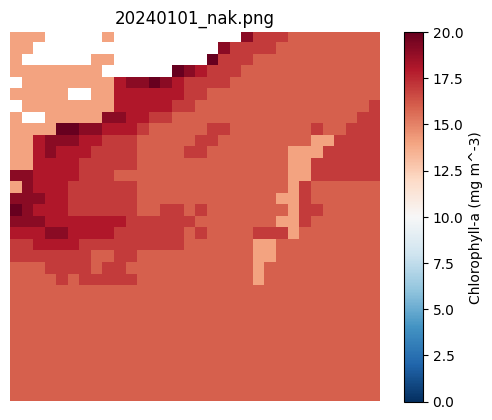

Loaded 20240101_sae.png with shape (1108, 1108) and dtype uint8
20240101_sae.png Unique Values: [14.]
20240101_sae.png NaN Ratio: 65.53%
20240101_sae.png Zero Value Ratio: 0.00%


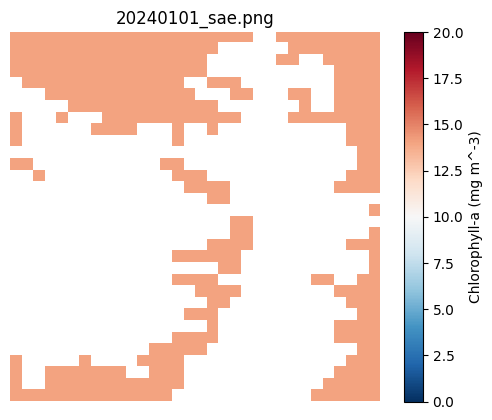

Loaded 20240117_nak.png with shape (1108, 1108) and dtype uint8
20240117_nak.png Unique Values: [14. 15. 16. 17. 18. 19. 20.]
20240117_nak.png NaN Ratio: 1.72%
20240117_nak.png Zero Value Ratio: 0.00%


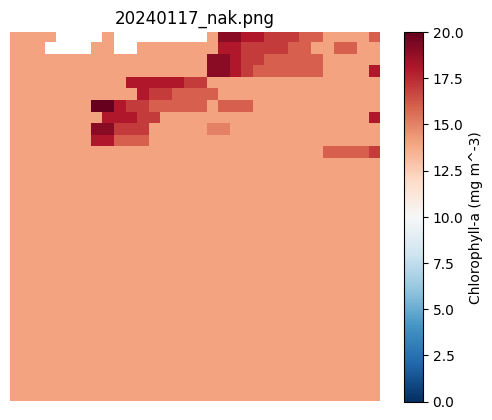

Loaded 20240117_sae.png with shape (1108, 1108) and dtype uint8
20240117_sae.png Unique Values: [14.]
20240117_sae.png NaN Ratio: 8.48%
20240117_sae.png Zero Value Ratio: 0.00%


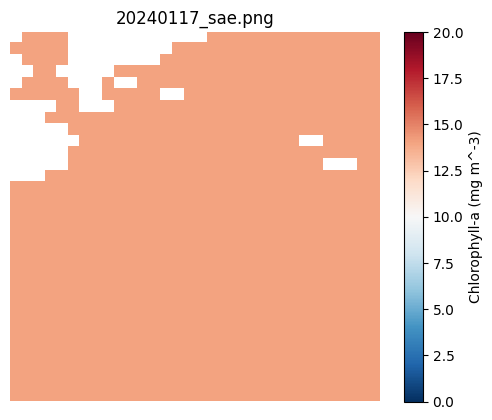

Loaded 20240109_nak.png with shape (1108, 1108) and dtype uint8
20240109_nak.png Unique Values: [14. 16. 17. 18. 19. 20.]
20240109_nak.png NaN Ratio: 6.79%
20240109_nak.png Zero Value Ratio: 0.00%


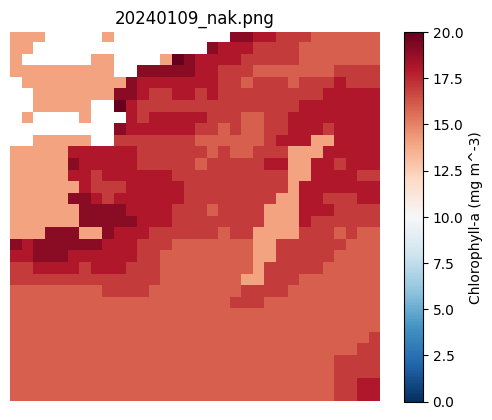

Loaded 20240109_sae.png with shape (1108, 1108) and dtype uint8
20240109_sae.png Unique Values: [14.]
20240109_sae.png NaN Ratio: 84.58%
20240109_sae.png Zero Value Ratio: 0.00%


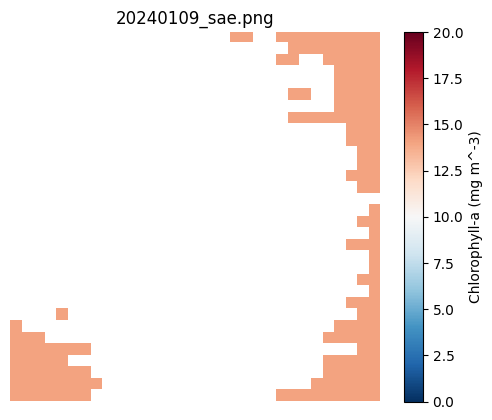

Loaded 20240125_nak.png with shape (1108, 1108) and dtype uint8
20240125_nak.png Unique Values: [14. 16. 17. 18. 19. 20.]
20240125_nak.png NaN Ratio: 5.74%
20240125_nak.png Zero Value Ratio: 0.00%


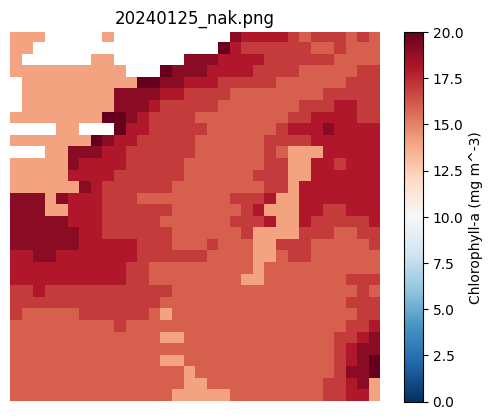

Loaded 20240125_sae.png with shape (1108, 1108) and dtype uint8
20240125_sae.png Unique Values: [14.]
20240125_sae.png NaN Ratio: 75.78%
20240125_sae.png Zero Value Ratio: 0.00%


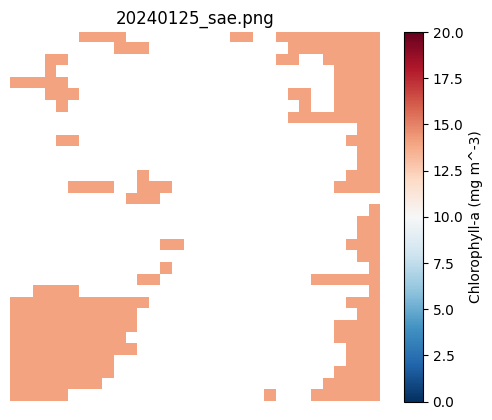

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # For reading PNG files

# Set the root directory where preprocessed images are stored
root_directory = "/media/juneyonglee/My Book/Preprocessed/MODIS_32patch_noresize/2024/01/"

# Custom colormap for ocean data
def create_custom_cmap():
    viridis = plt.colormaps['viridis']
    return viridis

# Set custom colormap
custom_cmap = create_custom_cmap()

# Process all PNG files in the directory
for dirpath, dirnames, filenames in os.walk(root_directory):
    for filename in filenames:
        # Skip files containing '_bar' in their name
        if filename.endswith(".png") and '_bar' not in filename:
            file_path = os.path.join(dirpath, filename)

            # Load image using PIL (for .png files)
            img = np.array(Image.open(file_path).convert('L'))  # Convert to grayscale

            if img is None:
                print(f"{filename} could not be loaded.")
                continue

            print(f"Loaded {filename} with shape {img.shape} and dtype {img.dtype}")

            # Convert MODIS fill values (-999 or similar) and values above 20 to NaN
            img = np.where((img == -999) | (img > 20), np.nan, img)

            # Calculate NaN ratio
            total_pixels = img.size
            nan_count = np.count_nonzero(np.isnan(img))
            nan_ratio = (nan_count / total_pixels) * 100

            # Calculate zero ratio
            zero_count = np.count_nonzero(img == 0)
            zero_ratio = (zero_count / total_pixels) * 100

            # Calculate unique values (excluding NaNs)
            unique_values = np.unique(img[~np.isnan(img)])

            # Display only a sample of unique values if there are too many
            if len(unique_values) > 10:
                unique_values_sample = unique_values[:10]
                print(f"{filename} Unique Values (Sample): {unique_values_sample} ... [{len(unique_values)} total unique values]")
            else:
                print(f"{filename} Unique Values: {unique_values}")

            # Print statistics
            print(f"{filename} NaN Ratio: {nan_ratio:.2f}%")
            print(f"{filename} Zero Value Ratio: {zero_ratio:.2f}%")

            # Display the image
            plt.imshow(img,cmap='RdBu_r', interpolation='none', vmin=0, vmax=20)
            plt.axis('off')
            plt.colorbar(label='Chlorophyll-a (mg m^-3)')
            plt.title(f"{filename}")
            plt.show()


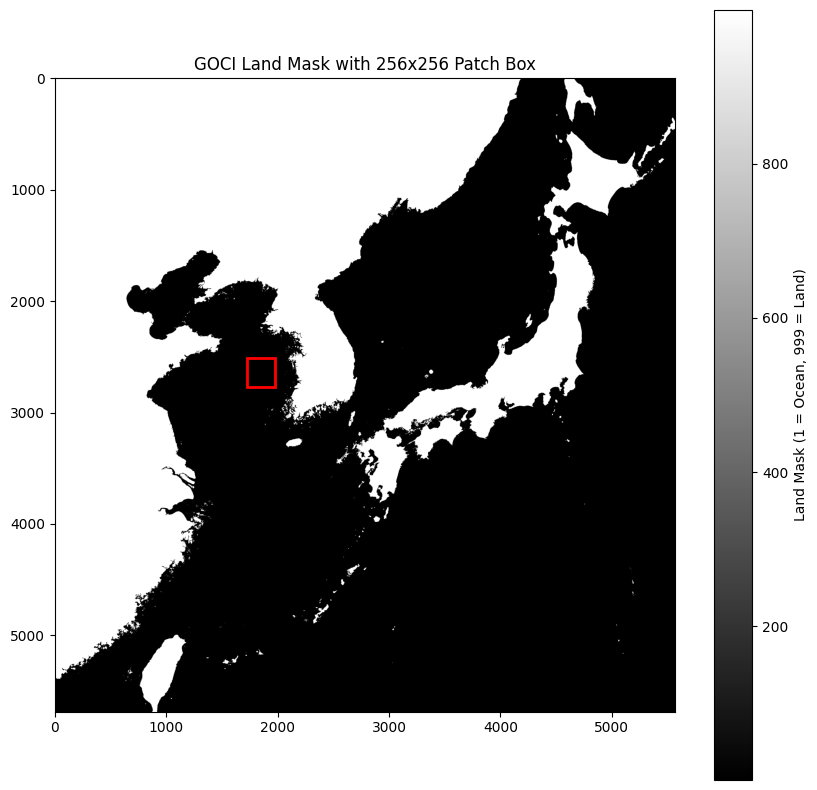

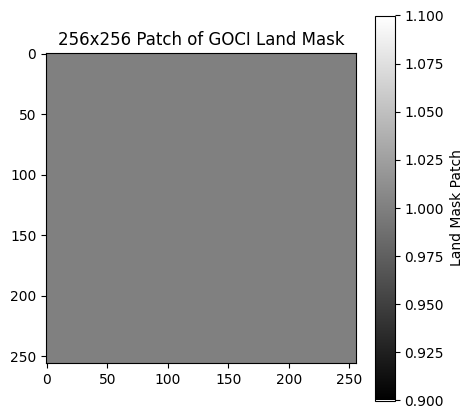

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re

# 육지/바다 npy 파일 경로
land_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999.npy'
goci_land_sea_mask = np.load(land_mask_path)  # GOCI 마스크 로드

# 파일명에서 row, col 좌표 추출
filename = '/home/juneyonglee/MyData/backup_20240914/AY_UST/ust21_GOCI_differencemap/difference_map_saemangeum_20170608_r1723_c2511.png'
coordinates = re.search(r'r(\d+)_c(\d+)', filename)
if coordinates:
    row, col = int(coordinates.group(1)), int(coordinates.group(2))
else:
    print("Filename does not contain row and col information in expected format.")
    row, col = None, None

# Define the patch size
patch_size = 256

# Calculate patch boundaries
patch_x_min, patch_x_max = row, row + patch_size
patch_y_min, patch_y_max = col, col + patch_size

def display_land_mask_with_box(goci_land_sea_mask, patch_x_min, patch_x_max, patch_y_min, patch_y_max):
    # 전체 육지 마스크 이미지에 패치 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(goci_land_sea_mask, cmap='gray', alpha=1)
    plt.colorbar(label='Land Mask (1 = Ocean, 999 = Land)')

    # 256x256 패치에 빨간색 사각형 추가
    rect = Rectangle((patch_x_min, patch_y_min), patch_x_max - patch_x_min, patch_y_max - patch_y_min,
                     linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

    plt.title('GOCI Land Mask with 256x256 Patch Box')
    plt.show()

    # 256x256 패치 추출 및 표시
    patch = goci_land_sea_mask[patch_y_min:patch_y_max, patch_x_min:patch_x_max]
    plt.figure(figsize=(5, 5))
    plt.imshow(patch, cmap='gray')
    plt.colorbar(label='Land Mask Patch')
    plt.title('256x256 Patch of GOCI Land Mask')
    plt.show()

# GOCI 마스크에 패치 범위에 네모 박스 표시 및 패치 추출
display_land_mask_with_box(goci_land_sea_mask, patch_x_min, patch_x_max, patch_y_min, patch_y_max)


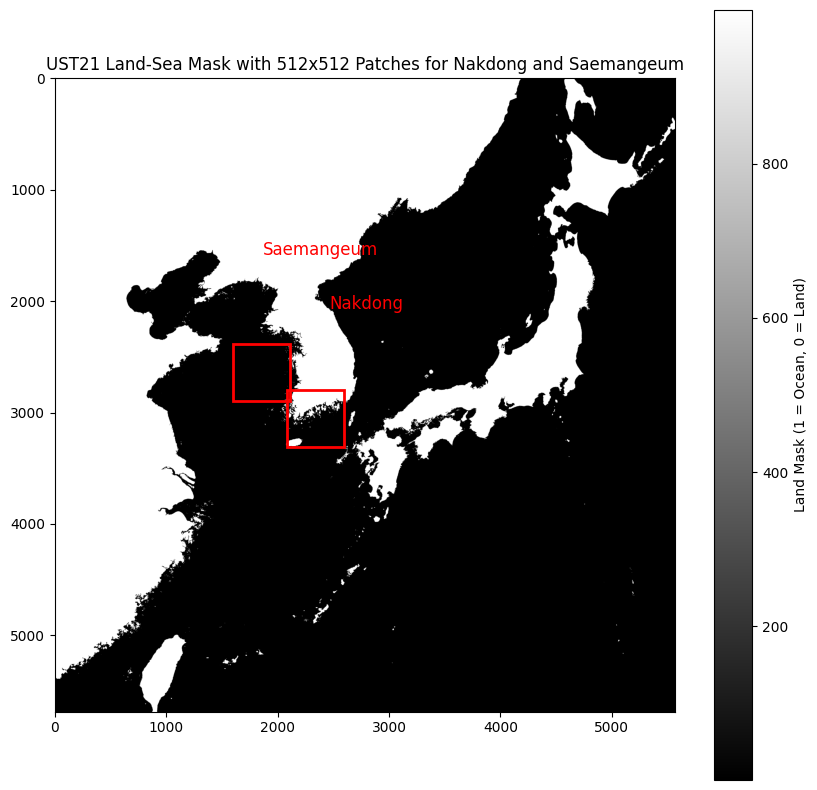

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Paths to UST21 land-sea mask
land_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999.npy'
ust21_land_sea_mask = np.load(land_mask_path)  # Load UST21 land-sea mask

# Coordinates for the centers of the Nakdong and Saemangeum regions
nakdong_center = (2336, 3053)  # (row, col)
saemangeum_center = (1851, 2639)  # (row, col)

# Patch size
patch_size = 512

def display_ust21_land_mask_with_patches(land_sea_mask, nakdong_center, saemangeum_center, patch_size=512):
    # Calculate the top-left corner of the patches based on the center coordinates
    nakdong_top_left = (nakdong_center[0] - patch_size // 2, nakdong_center[1] - patch_size // 2)
    saemangeum_top_left = (saemangeum_center[0] - patch_size // 2, saemangeum_center[1] - patch_size // 2)

    # Display the UST21 land-sea mask
    plt.figure(figsize=(10, 10))
    plt.imshow(land_sea_mask, cmap='gray', alpha=1)
    plt.colorbar(label='Land Mask (1 = Ocean, 0 = Land)')

    # Draw red rectangle for Nakdong
    nakdong_rect = Rectangle(nakdong_top_left, patch_size, patch_size, linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(nakdong_rect)
    plt.text(nakdong_top_left[1], nakdong_top_left[0] - 10, 'Nakdong', color='red', fontsize=12, ha='center')

    # Draw red rectangle for Saemangeum
    saemangeum_rect = Rectangle(saemangeum_top_left, patch_size, patch_size, linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(saemangeum_rect)
    plt.text(saemangeum_top_left[1], saemangeum_top_left[0] - 10, 'Saemangeum', color='red', fontsize=12, ha='center')

    # Set title and show the plot
    plt.title('UST21 Land-Sea Mask with 512x512 Patches for Nakdong and Saemangeum')
    plt.show()

# Display the land-sea mask with Nakdong and Saemangeum patches
display_ust21_land_mask_with_patches(ust21_land_sea_mask, nakdong_center, saemangeum_center, patch_size)


Checking (row, col) as (y, x) without flipping:


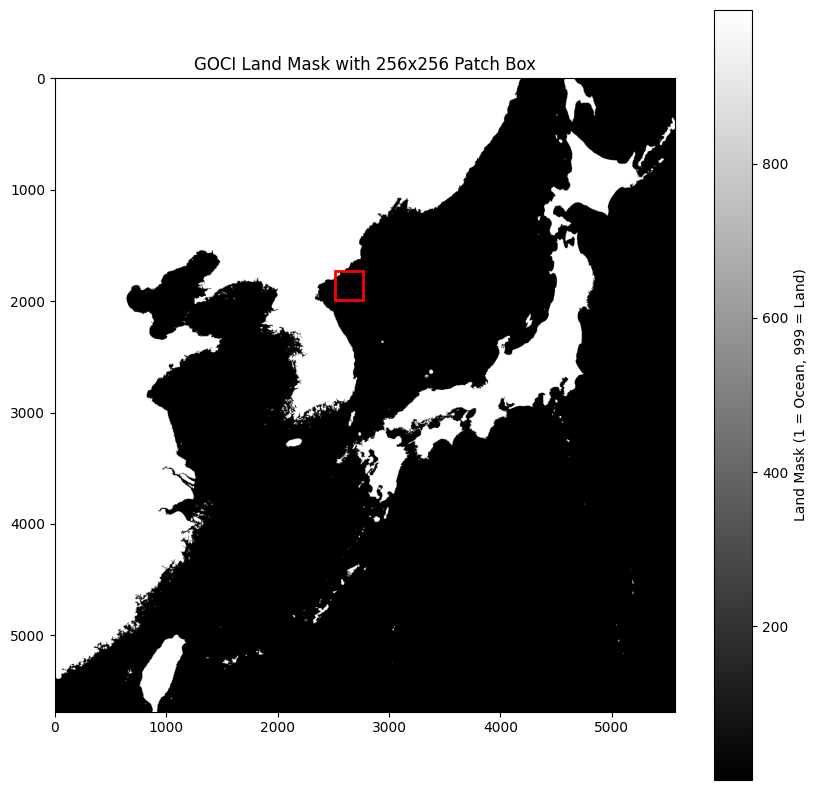

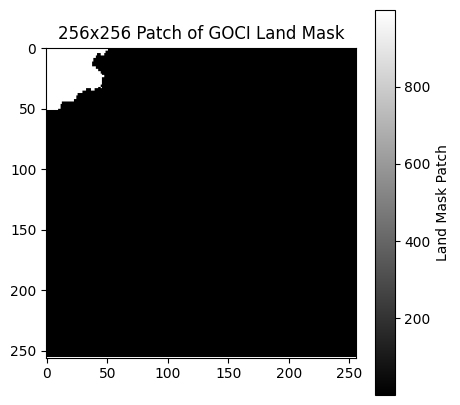

Checking (row, col) as (x, y) with flipping:


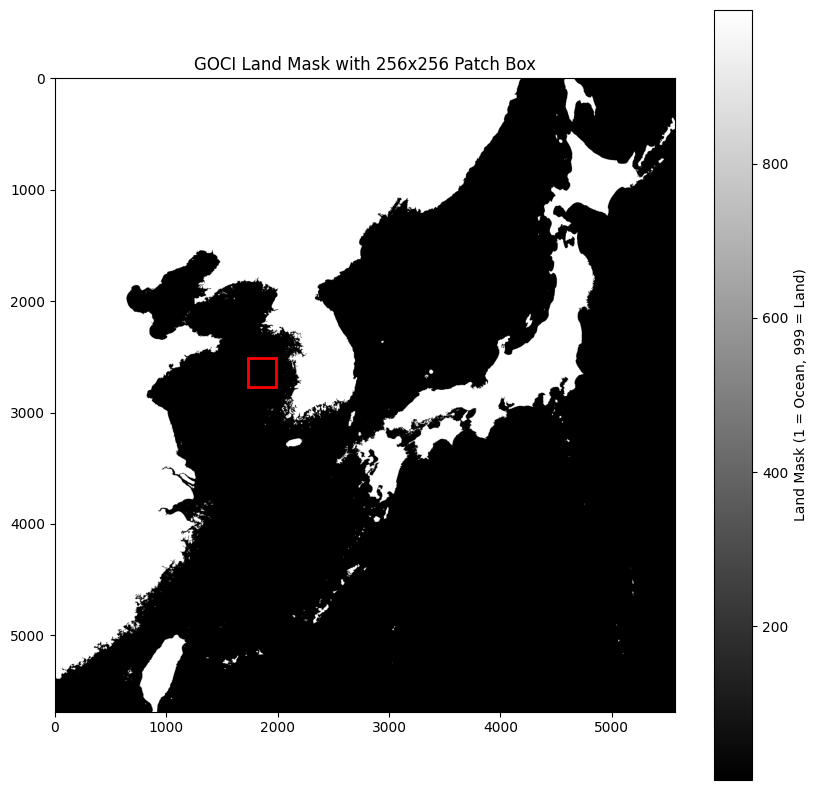

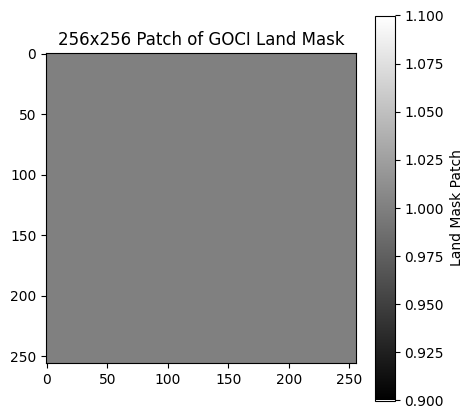

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re

# Load the land/sea mask array
land_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999.npy'
goci_land_sea_mask = np.load(land_mask_path)

# Extract row, col coordinates from filename
filename = '/home/juneyonglee/MyData/backup_20240914/AY_UST/performance/GOCI/GOCI_chl/550000/color_10/sae_20121127_r1733_c2511.png'
coordinates = re.search(r'r(\d+)_c(\d+)', filename)
if coordinates:
    row, col = int(coordinates.group(1)), int(coordinates.group(2))
else:
    print("Filename does not contain row and col information in expected format.")
    row, col = None, None

# Define the patch size
patch_size = 256

# First approach: interpret (row, col) as (y, x) coordinates
def display_land_mask_with_box(mask, row, col, patch_size, flip_coords=False):
    # Flip row and col if specified
    if flip_coords:
        row, col = col, row

    # Calculate patch boundaries
    patch_x_min, patch_x_max = col, col + patch_size
    patch_y_min, patch_y_max = row, row + patch_size

    # Display the full land-sea mask with a red box around the patch
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray', alpha=1)
    plt.colorbar(label='Land Mask (1 = Ocean, 999 = Land)')
    rect = Rectangle((patch_x_min, patch_y_min), patch_x_max - patch_x_min, patch_y_max - patch_y_min,
                     linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.title('GOCI Land Mask with 256x256 Patch Box')
    plt.show()

    # Extract and display the 256x256 patch
    patch = mask[patch_y_min:patch_y_max, patch_x_min:patch_x_max]
    plt.figure(figsize=(5, 5))
    plt.imshow(patch, cmap='gray')
    plt.colorbar(label='Land Mask Patch')
    plt.title('256x256 Patch of GOCI Land Mask')
    plt.show()

# Check both coordinate interpretations
print("Checking (row, col) as (y, x) without flipping:")
display_land_mask_with_box(goci_land_sea_mask, row, col, patch_size, flip_coords=False)

print("Checking (row, col) as (x, y) with flipping:")
display_land_mask_with_box(goci_land_sea_mask, row, col, patch_size, flip_coords=True)


Checking (row, col) as (y, x) without flipping:


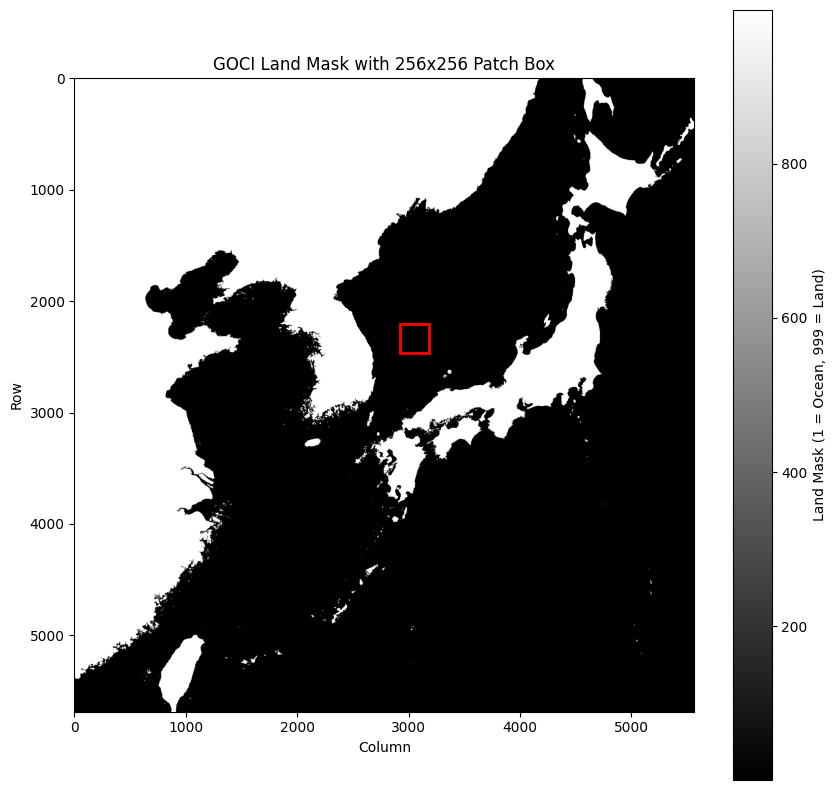

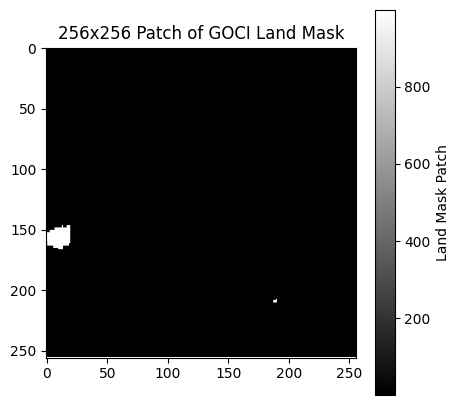

Checking (row, col) as (x, y) with flipping:


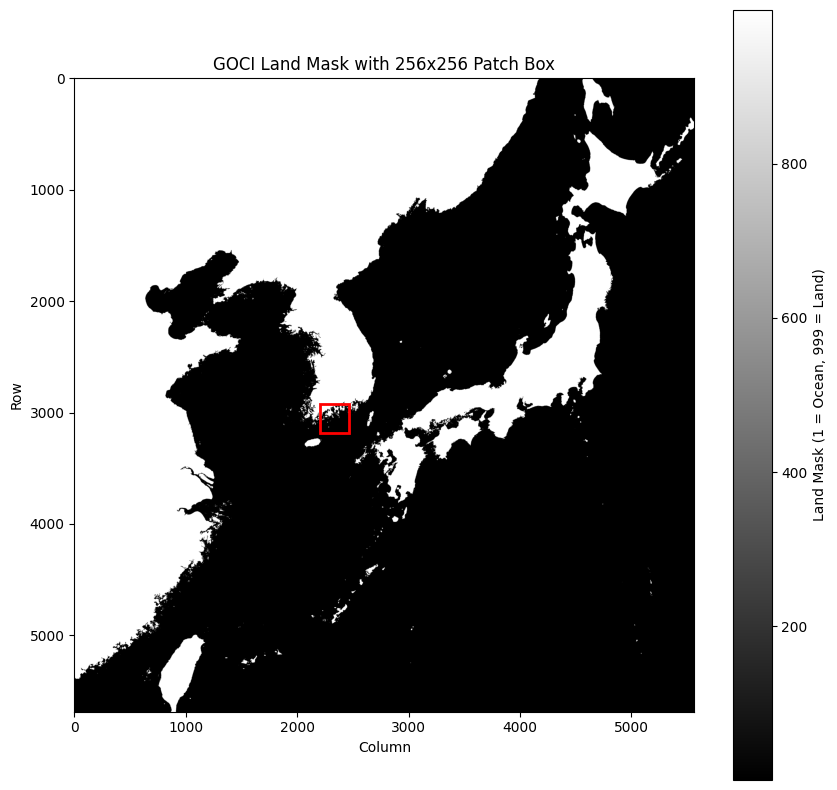

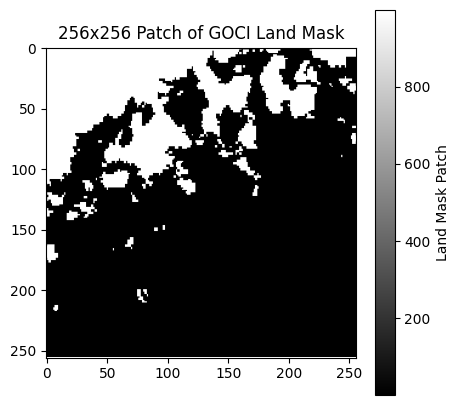

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the land/sea mask array
land_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999.npy'
goci_land_sea_mask = np.load(land_mask_path)

# Define row and col manually
row = 2208  # Replace with desired row value
col = 2925  # Replace with desired col value

# Define the patch size
patch_size = 256

# Function to display the land-sea mask with a red box and extract a patch
def display_land_mask_with_box(mask, row, col, patch_size, flip_coords=False):
    # Flip row and col if specified
    if flip_coords:
        row, col = col, row

    # Calculate patch boundaries
    patch_x_min, patch_x_max = col, col + patch_size
    patch_y_min, patch_y_max = row, row + patch_size

    # Display the full land-sea mask with a red box around the patch
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray', alpha=1)
    plt.colorbar(label='Land Mask (1 = Ocean, 999 = Land)')
    rect = Rectangle((patch_x_min, patch_y_min), patch_x_max - patch_x_min, patch_y_max - patch_y_min,
                     linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.title('GOCI Land Mask with 256x256 Patch Box')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

    # Extract and display the 256x256 patch
    patch = mask[patch_y_min:patch_y_max, patch_x_min:patch_x_max]
    plt.figure(figsize=(5, 5))
    plt.imshow(patch, cmap='gray')
    plt.colorbar(label='Land Mask Patch')
    plt.title('256x256 Patch of GOCI Land Mask')
    plt.show()

# Check both coordinate interpretations
print("Checking (row, col) as (y, x) without flipping:")
display_land_mask_with_box(goci_land_sea_mask, row, col, patch_size, flip_coords=False)

print("Checking (row, col) as (x, y) with flipping:")
display_land_mask_with_box(goci_land_sea_mask, row, col, patch_size, flip_coords=True)


Checking (row, col) as (y, x) without flipping:


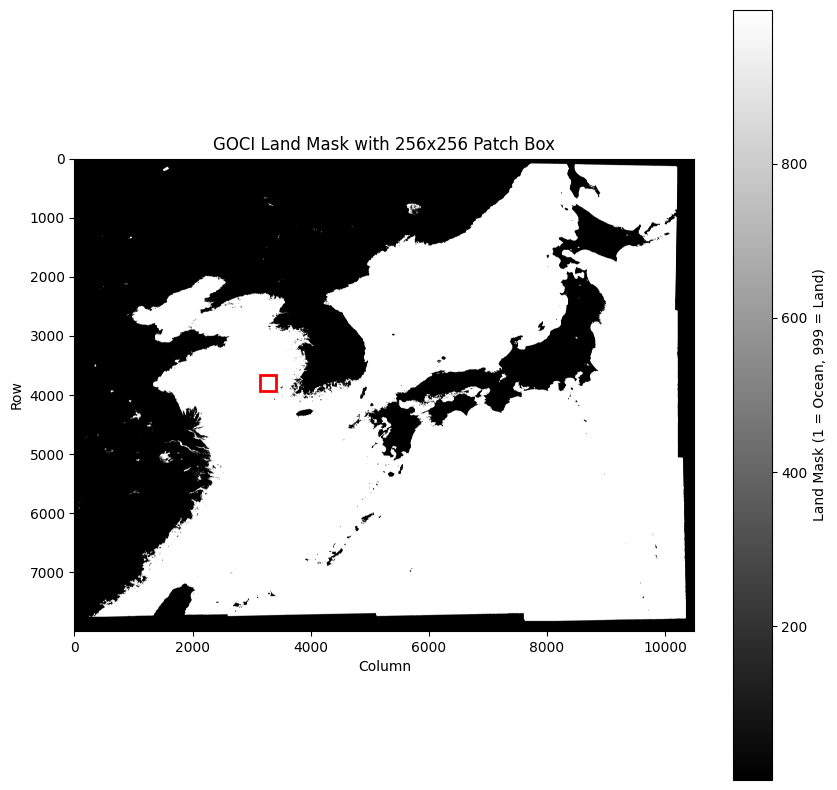

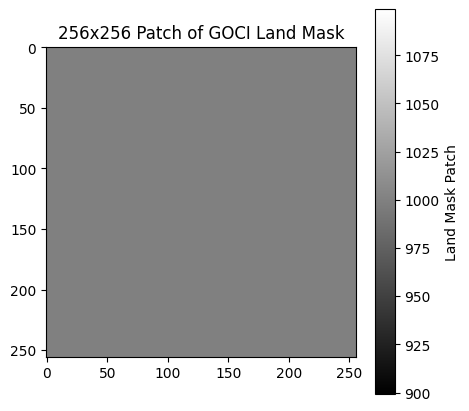

Checking (row, col) as (x, y) with flipping:


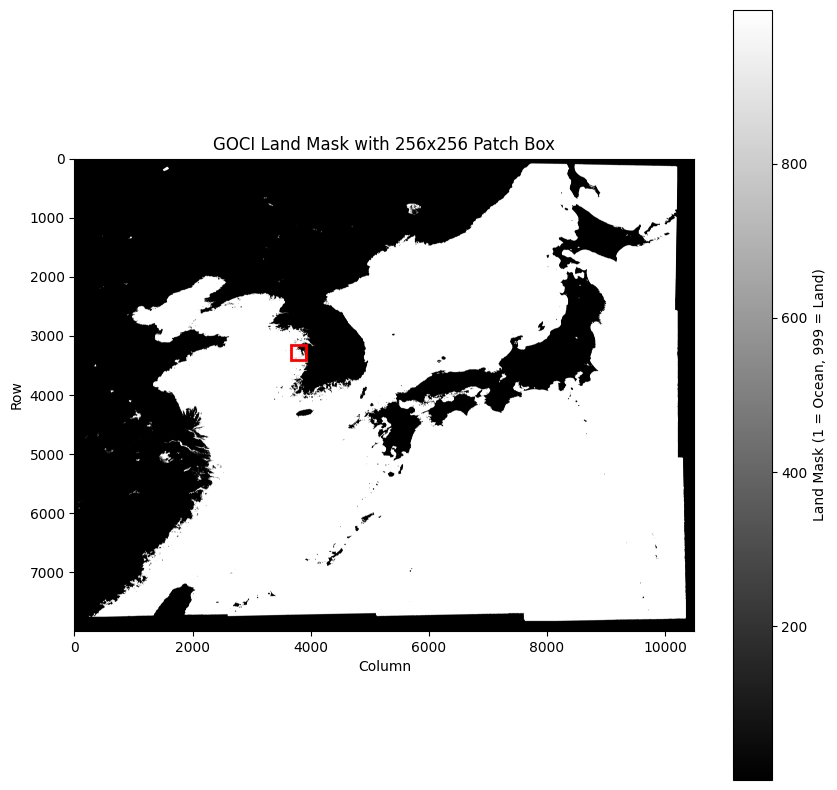

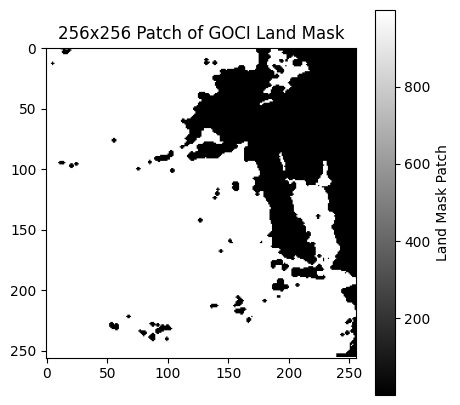

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the land/sea mask array
land_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.npy'
goci_land_sea_mask = np.load(land_mask_path)

# Define row and col manually
row = 3668  # Replace with desired row value
col = 3150  # Replace with desired col value

# Define the patch size
patch_size = 256

# Function to display the land-sea mask with a red box and extract a patch
def display_land_mask_with_box(mask, row, col, patch_size, flip_coords=False):
    # Flip row and col if specified
    if flip_coords:
        row, col = col, row

    # Calculate patch boundaries
    patch_x_min, patch_x_max = col, col + patch_size
    patch_y_min, patch_y_max = row, row + patch_size

    # Display the full land-sea mask with a red box around the patch
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray', alpha=1)
    plt.colorbar(label='Land Mask (1 = Ocean, 999 = Land)')
    rect = Rectangle((patch_x_min, patch_y_min), patch_x_max - patch_x_min, patch_y_max - patch_y_min,
                     linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.title('GOCI Land Mask with 256x256 Patch Box')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

    # Extract and display the 256x256 patch
    patch = mask[patch_y_min:patch_y_max, patch_x_min:patch_x_max]
    plt.figure(figsize=(5, 5))
    plt.imshow(patch, cmap='gray')
    plt.colorbar(label='Land Mask Patch')
    plt.title('256x256 Patch of GOCI Land Mask')
    plt.show()

# Check both coordinate interpretations
print("Checking (row, col) as (y, x) without flipping:")
display_land_mask_with_box(goci_land_sea_mask, row, col, patch_size, flip_coords=False)

print("Checking (row, col) as (x, y) with flipping:")
display_land_mask_with_box(goci_land_sea_mask, row, col, patch_size, flip_coords=True)


2025-01-21 18:22:07,001 - INFO - 추출된 시작 좌표 - 행: 3602, 열: 3723


2025-01-21 18:22:08,503 - INFO - Land-sea mask loaded successfully.
2025-01-21 18:22:10,895 - INFO - Unique values in 'Land' mask: [0. 1.]
2025-01-21 18:22:11,054 - INFO - Land-sea mask processed: Land=999, Ocean=1.
2025-01-21 18:22:11,055 - INFO - 마스크 크기: (8000, 10500)
2025-01-21 18:22:11,057 - INFO - 마스크에서 추출된 영역 크기: (256, 256)
2025-01-21 18:22:11,059 - INFO - 파일 '/media/juneyonglee/My Book/Preprocessed/UST21/test/perfect/20201201_r3602_c3723.tiff'을 성공적으로 읽었습니다.
2025-01-21 18:22:11,060 - INFO - 이미지 데이터를 float 형식으로 변환했습니다.
2025-01-21 18:22:11,060 - INFO - 이미지 크기: (256, 256)
2025-01-21 18:22:11,060 - INFO - 마스크와 이미지의 크기가 일치합니다.
2025-01-21 18:22:11,061 - INFO - 픽셀 값을 0.01에서 10 사이로 클리핑했습니다.
2025-01-21 18:22:11,062 - INFO - 마스크를 이미지에 성공적으로 적용했습니다.
/tmp/ipykernel_1601442/1521353874.py:129: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get

Unique values in 'Land' mask: [0. 1.]


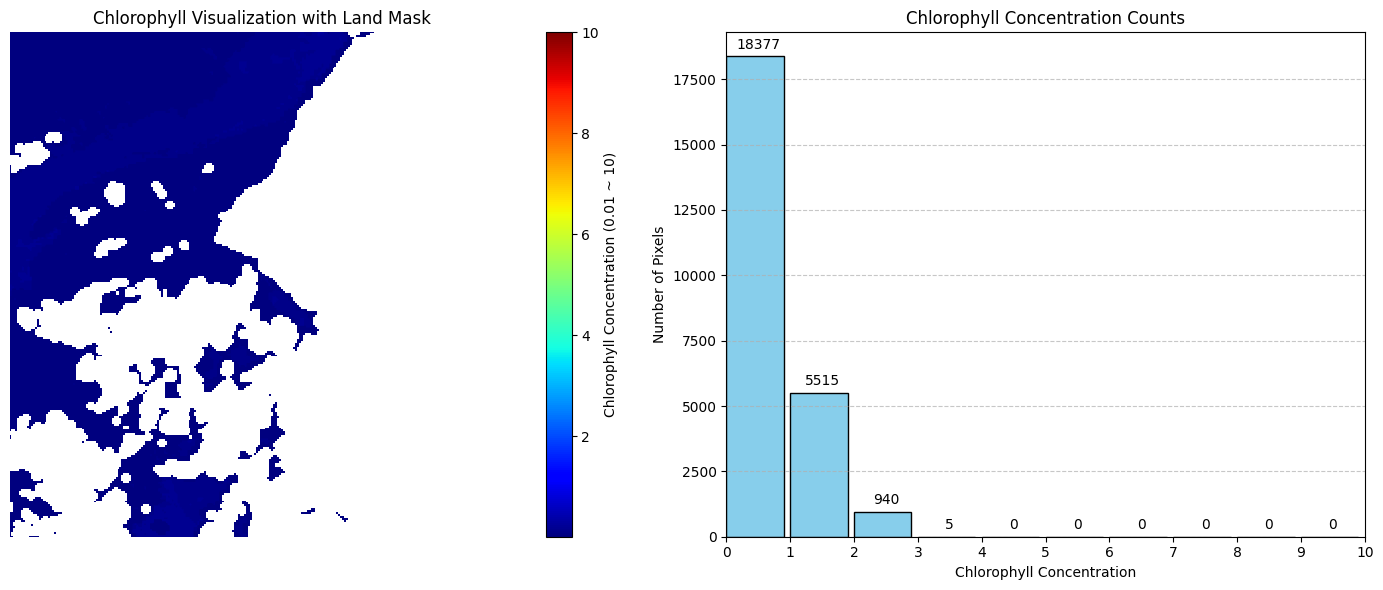

2025-01-21 18:22:11,368 - INFO - 축소된 마스크 크기: (800, 1050)



Chlorophyll Concentration Counts:
0.00 - 1.00: 18377
1.00 - 2.00: 5515
2.00 - 3.00: 940
3.00 - 4.00: 5
4.00 - 5.00: 0
5.00 - 6.00: 0
6.00 - 7.00: 0
7.00 - 8.00: 0
8.00 - 9.00: 0
9.00 - 10.00: 0


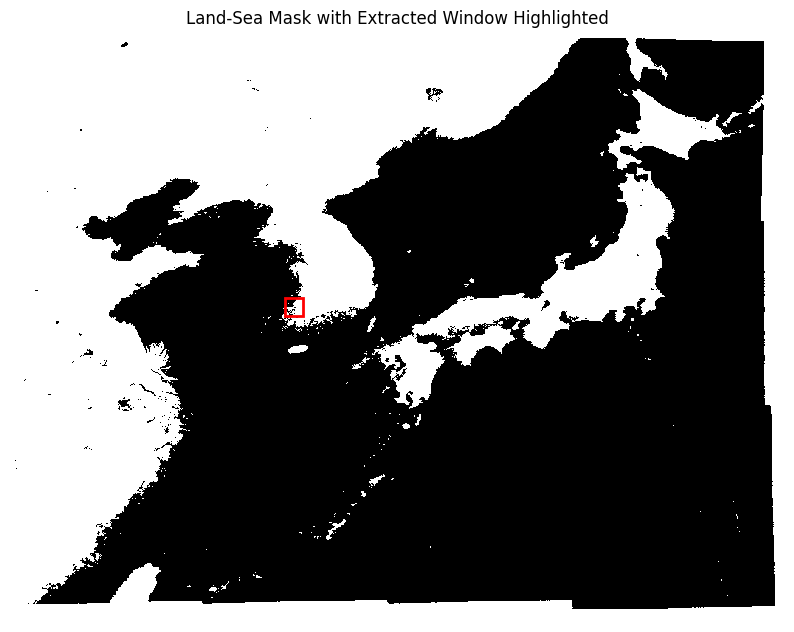

In [5]:
# 필요한 라이브러리 임포트
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.io import loadmat
import logging
import re
from skimage.transform import resize
import matplotlib.patches as patches

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 파일 경로 지정
file_path = '/media/juneyonglee/My Book/Preprocessed/UST21/test/perfect/20201201_r3602_c3723.tiff'
mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.mat'

########## Extract Coordinates from Filename ##########
def extract_coordinates(filename):
    """
    파일 이름에서 r과 c로 시작하는 숫자를 추출하여 행과 열 좌표를 반환합니다.
    예: '20201201_r3103_c3592.tiff' -> (3103, 3592)
    """
    pattern = r'_r(\d+)_c(\d+)\.tiff$'
    match = re.search(pattern, filename)
    if match:
        row = int(match.group(1))
        col = int(match.group(2))
        return row, col
    else:
        logging.error("파일 이름에서 좌표를 추출할 수 없습니다. 파일 이름 형식을 확인하세요.")
        exit(1)

# 파일 이름에서 좌표 추출
filename = file_path.split('/')[-1]
start_row, start_col = extract_coordinates(filename)
logging.info(f"추출된 시작 좌표 - 행: {start_row}, 열: {start_col}")

########## Load and Prepare Land-Sea Mask ##########
try:
    land_sea_mask_mat = loadmat(mask_path)
    land_sea_mask_original = land_sea_mask_mat['Land']  # MATLAB에서 'Land' 변수 가져오기
    logging.info("Land-sea mask loaded successfully.")

    # 확인: 고유값 출력
    unique_values = np.unique(land_sea_mask_original)
    logging.info(f"Unique values in 'Land' mask: {unique_values}")
    print(f"Unique values in 'Land' mask: {unique_values}")

    # 올바른 마스킹 로직 설정
    # 여기서는 '1'이 Land, '0'이 Ocean이라고 가정합니다.
    # 따라서 Land (1)을 999로, Ocean (0)을 1로 설정합니다.
    land_sea_mask = np.where(land_sea_mask_original == 1, 999, 1)
    logging.info("Land-sea mask processed: Land=999, Ocean=1.")
except FileNotFoundError:
    logging.error(f"마스크 파일을 찾을 수 없습니다: {mask_path}")
    exit(1)
except KeyError:
    logging.error("마스크 파일 내 'Land' 변수를 찾을 수 없습니다.")
    exit(1)
except Exception as e:
    logging.error(f"Failed to load land-sea mask: {e}")
    raise

# 마스크의 전체 크기 확인
mask_height, mask_width = land_sea_mask.shape
logging.info(f"마스크 크기: ({mask_height}, {mask_width})")

# 마스크에서 256x256 영역 추출
window_size = 256
end_row = start_row + window_size
end_col = start_col + window_size

# 마스크 영역이 경계를 벗어나지 않는지 확인
if end_row > mask_height or end_col > mask_width:
    logging.error(f"추출하려는 마스크 영역이 마스크의 경계를 벗어납니다. "
                  f"마스크 크기: ({mask_height}, {mask_width}), "
                  f"추출 범위: 행 {start_row}-{end_row}, 열 {start_col}-{end_col}")
    exit(1)

land_sea_mask_window = land_sea_mask[start_row:end_row, start_col:end_col]
logging.info(f"마스크에서 추출된 영역 크기: {land_sea_mask_window.shape}")

# TIFF 파일 읽기
try:
    image = tiff.imread(file_path)
    logging.info(f"파일 '{file_path}'을 성공적으로 읽었습니다.")
except FileNotFoundError:
    logging.error(f"파일을 찾을 수 없습니다: {file_path}")
    exit(1)
except Exception as e:
    logging.error(f"파일을 읽는 중 오류가 발생했습니다: {e}")
    exit(1)

# 데이터 타입 확인 및 변환
if not np.issubdtype(image.dtype, np.floating):
    image = image.astype(np.float32)
    logging.info("이미지 데이터를 float 형식으로 변환했습니다.")

# 이미지 크기 확인
image_height, image_width = image.shape
logging.info(f"이미지 크기: ({image_height}, {image_width})")

# 마스크와 이미지의 크기 일치 확인
if land_sea_mask_window.shape != image.shape:
    logging.error(f"마스크의 추출된 크기 {land_sea_mask_window.shape}와 이미지 크기 {image.shape}가 일치하지 않습니다.")
    exit(1)
else:
    logging.info("마스크와 이미지의 크기가 일치합니다.")

# 클로로필 값의 범위 설정
chlorophyll_min = 0.01
chlorophyll_max = 10.0

# 픽셀 값 클리핑
image_clipped = np.clip(image, chlorophyll_min, chlorophyll_max)
logging.info("픽셀 값을 0.01에서 10 사이로 클리핑했습니다.")

# 정규화 (0 ~ 1)
norm = colors.Normalize(vmin=chlorophyll_min, vmax=chlorophyll_max)
image_normalized = norm(image_clipped)

# 육지 마스크 적용: 마스크 값이 999인 경우 (육지) NaN으로 설정
image_masked = np.where(land_sea_mask_window == 999, np.nan, image_normalized)
logging.info("마스크를 이미지에 성공적으로 적용했습니다.")

# 클로로필을 표현할 컬러맵 설정 ('jet' 컬러맵 사용)
cmap = plt.cm.get_cmap('jet').copy()
cmap.set_bad(color='white')  # NaN 값을 검은색으로 설정

# 시각화와 클로로필 값의 카운트
plt.figure(figsize=(14, 6))

# 시각화 - 클로로필 이미지
plt.subplot(1, 2, 1)
img_plot = plt.imshow(image_masked, cmap=cmap, vmin=chlorophyll_min, vmax=chlorophyll_max)
cbar = plt.colorbar(img_plot, label='Chlorophyll Concentration (0.01 ~ 10)')
plt.title('Chlorophyll Visualization with Land Mask')
plt.axis('off')

# 클로로필 값의 카운트 출력
plt.subplot(1, 2, 2)
# NaN 값을 제외한 데이터로 클로로필 값 추출
chlorophyll_values = image_clipped[land_sea_mask_window != 999].flatten()

# 특정 범위로 클로로필 값을 분류 (예: 0.01~1, 1~2, ..., 9~10)
bins = np.arange(0, 11, 1)  # 0~1, 1~2, ..., 10
counts, bin_edges = np.histogram(chlorophyll_values, bins=bins)

# 클로로필 농도별 픽셀 수 출력
plt.bar(bins[:-1], counts, width=0.9, align='edge', edgecolor='black', color='skyblue')
plt.title('Chlorophyll Concentration Counts')
plt.xlabel('Chlorophyll Concentration')
plt.ylabel('Number of Pixels')
plt.xticks(bins)
plt.xlim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 바 위에 숫자 표시
for i, count in enumerate(counts):
    plt.text(bins[i] + 0.5, count + max(counts)*0.01, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 클로로필 농도별 픽셀 수를 텍스트로도 출력
print("\nChlorophyll Concentration Counts:")
for i in range(len(counts)):
    print(f"{bins[i]:.2f} - {bins[i+1]:.2f}: {counts[i]}")

# 시각화된 이미지 파일로 저장 (선택 사항)
# plt.savefig('chlorophyll_visualization_with_mask_and_counts.png', dpi=300, bbox_inches='tight')
# logging.info("시각화된 이미지를 'chlorophyll_visualization_with_mask_and_counts.png'으로 저장했습니다.")

########## Visualize Mask with Red Rectangle ##########
# 전체 마스크 시각화를 위한 축소 버전 생성
# 마스크가 매우 크므로 시각화를 위해 축소합니다
mask_resized = resize(
    land_sea_mask,
    (800, 1050),  # 적절한 크기로 축소 (예: 원본 비율 유지)
    order=0,  # Nearest-neighbor interpolation to preserve categorical values
    preserve_range=True,
    anti_aliasing=False
).astype(int)
logging.info(f"축소된 마스크 크기: {mask_resized.shape}")

# 창 크기 계산 (축소된 마스크에 맞게)
scale_row = mask_resized.shape[0] / mask_height
scale_col = mask_resized.shape[1] / mask_width

# 추출한 창의 축소된 좌표 계산
scaled_start_row = int(start_row * scale_row)
scaled_start_col = int(start_col * scale_col)
scaled_end_row = scaled_start_row + int(window_size * scale_row)
scaled_end_col = scaled_start_col + int(window_size * scale_col)

# 마스크 시각화
plt.figure(figsize=(10, 8))
plt.imshow(mask_resized, cmap='gray', interpolation='nearest')
plt.title('Land-Sea Mask with Extracted Window Highlighted')
plt.axis('off')

# 빨간색 사각형 추가 (x, y) = (scaled_start_col, scaled_start_row)
rect = patches.Rectangle(
    (scaled_start_col, scaled_start_row),  # (x, y) → (scaled_start_col, scaled_start_row)
    int(window_size * scale_col),         # 너비
    int(window_size * scale_row),         # 높이
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)
plt.gca().add_patch(rect)

plt.show()

# 시각화된 마스크 이미지 파일로 저장 (선택 사항)
# plt.savefig('land_sea_mask_with_window.png', dpi=300, bbox_inches='tight')
# logging.info("시각화된 마스크 이미지를 'land_sea_mask_with_window.png'으로 저장했습니다.")


2025-01-23 01:11:48,644 - INFO - 추출된 시작 좌표 - 행: 2560, 열: 2738


2025-01-23 01:11:48,699 - INFO - Land-sea mask loaded successfully.
2025-01-23 01:11:49,376 - INFO - Unique values in 'Land' mask: [-1.  0.]
2025-01-23 01:11:49,441 - INFO - Land-sea mask processed: Land=999, Ocean=1.
2025-01-23 01:11:49,441 - INFO - 마스크 크기: (5685, 5567)
2025-01-23 01:11:49,442 - INFO - 마스크에서 추출된 영역 크기: (256, 256)
2025-01-23 01:11:49,518 - INFO - 파일 '/media/juneyonglee/My Book/Preprocessed/GOCI_RRS/band4/test/perfect/20110401_r2560_c2738.tiff'을 성공적으로 읽었습니다.
2025-01-23 01:11:49,519 - INFO - 이미지 크기: (256, 256)
2025-01-23 01:11:49,519 - INFO - 마스크와 이미지의 크기가 일치합니다.
2025-01-23 01:11:49,520 - INFO - 픽셀 값을 0.01에서 10 사이로 클리핑했습니다.
/tmp/ipykernel_1601442/775159043.py:130: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('jet').copy()


Unique values in 'Land' mask: [-1.  0.]


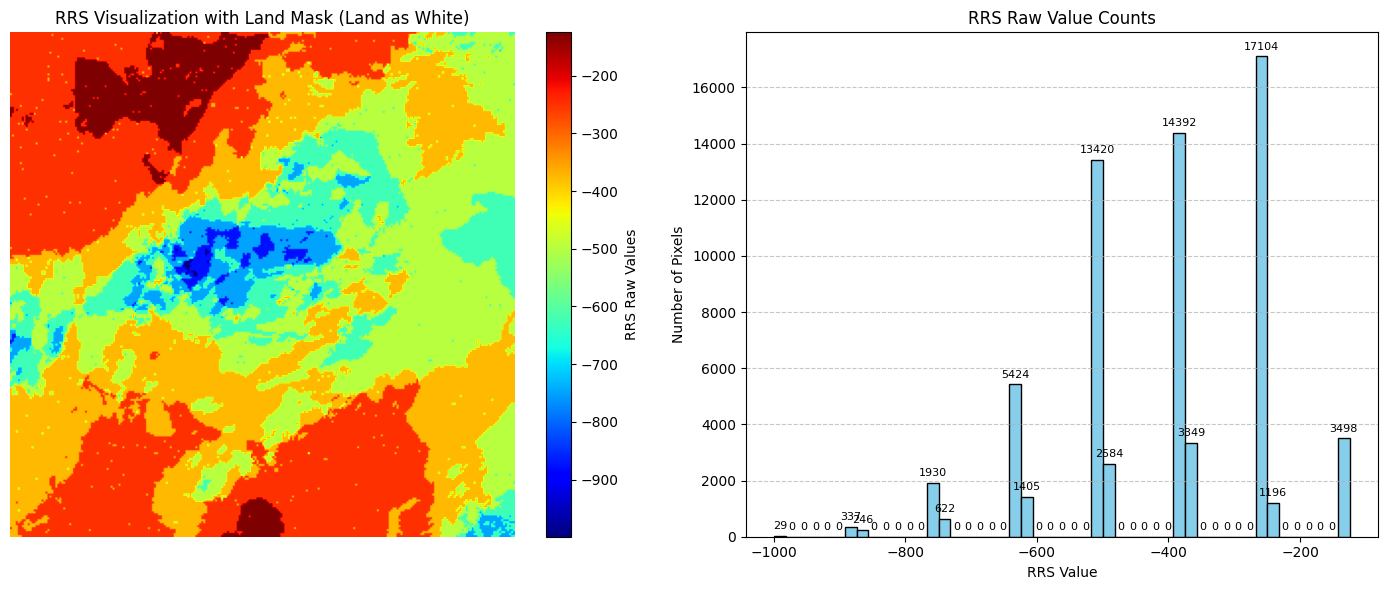


RRS Raw Value Counts:
-999.0000 - -981.1607: 29
-981.1607 - -963.3213: 0
-963.3213 - -945.4820: 0
-945.4820 - -927.6426: 0
-927.6426 - -909.8033: 0
-909.8033 - -891.9639: 0
-891.9639 - -874.1246: 337
-874.1246 - -856.2852: 246
-856.2852 - -838.4459: 0
-838.4459 - -820.6065: 0
-820.6065 - -802.7672: 0
-802.7672 - -784.9278: 0
-784.9278 - -767.0885: 0
-767.0885 - -749.2491: 1930
-749.2491 - -731.4098: 622
-731.4098 - -713.5704: 0
-713.5704 - -695.7311: 0
-695.7311 - -677.8918: 0
-677.8918 - -660.0524: 0
-660.0524 - -642.2131: 0
-642.2131 - -624.3737: 5424
-624.3737 - -606.5344: 1405
-606.5344 - -588.6950: 0
-588.6950 - -570.8557: 0
-570.8557 - -553.0163: 0
-553.0163 - -535.1770: 0
-535.1770 - -517.3376: 0
-517.3376 - -499.4983: 13420
-499.4983 - -481.6589: 2584
-481.6589 - -463.8196: 0
-463.8196 - -445.9802: 0
-445.9802 - -428.1409: 0
-428.1409 - -410.3016: 0
-410.3016 - -392.4622: 0
-392.4622 - -374.6229: 14392
-374.6229 - -356.7835: 3349
-356.7835 - -338.9442: 0
-338.9442 - -321.1048:

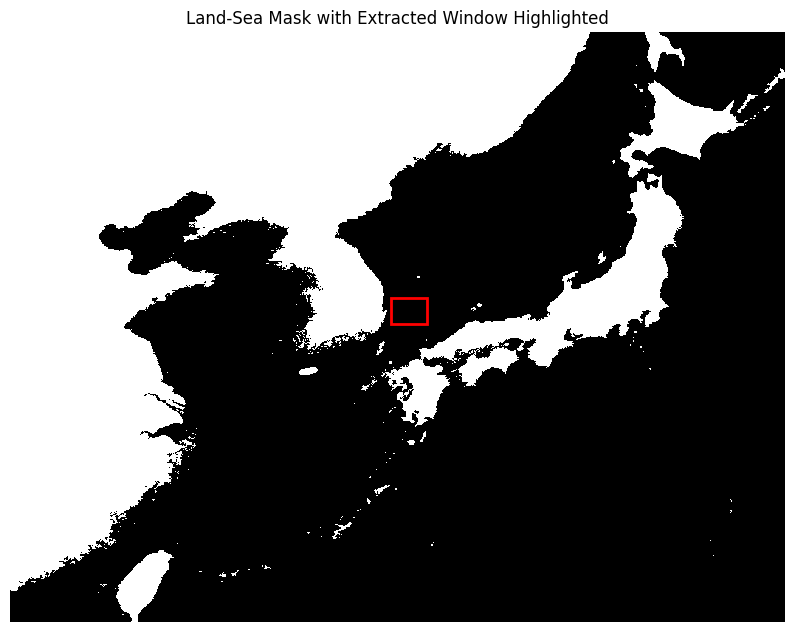

In [12]:
# 필요한 라이브러리 임포트
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import logging
import re
from skimage.transform import resize
import matplotlib.patches as patches

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 파일 경로 지정
# file_path = '/media/juneyonglee/My Book/Preprocessed/GOCI_RRS/band2/test/perfect/20110401_r2560_c2649.tiff'
# file_path = '/media/juneyonglee/My Book/Preprocessed/GOCI_RRS/band3/test/perfect/20110401_r2567_c2048.tiff'
file_path = '/media/juneyonglee/My Book/Preprocessed/GOCI_RRS/band4/test/perfect/20110401_r2560_c2738.tiff'

mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI.npy'

########## Extract Coordinates from Filename ##########
def extract_coordinates(filename):
    """
    파일 이름에서 r과 c로 시작하는 숫자를 추출하여 행과 열 좌표를 반환합니다.
    예: '20201201_r3103_c3592.tiff' -> (3103, 3592)
    """
    pattern = r'_r(\d+)_c(\d+)\.tiff$'
    match = re.search(pattern, filename)
    if match:
        row = int(match.group(1))
        col = int(match.group(2))
        return row, col
    else:
        logging.error("파일 이름에서 좌표를 추출할 수 없습니다. 파일 이름 형식을 확인하세요.")
        exit(1)

# 파일 이름에서 좌표 추출
filename = file_path.split('/')[-1]
start_row, start_col = extract_coordinates(filename)
logging.info(f"추출된 시작 좌표 - 행: {start_row}, 열: {start_col}")

########## Load and Prepare Land-Sea Mask ##########
try:
    # .npy 파일 로드
    land_sea_mask_original = np.load(mask_path)
    logging.info("Land-sea mask loaded successfully.")

    # 확인: 고유값 출력
    unique_values = np.unique(land_sea_mask_original)
    logging.info(f"Unique values in 'Land' mask: {unique_values}")
    print(f"Unique values in 'Land' mask: {unique_values}")

    # 올바른 마스킹 로직 설정
    if (-1 in unique_values) and (0 in unique_values):
        land_sea_mask = np.where(land_sea_mask_original == -1, 999, 1)
        logging.info("Land-sea mask processed: Land=999, Ocean=1.")
    else:
        logging.error("마스크의 예상 고유값 [-1, 0]이 아닙니다. 마스크 데이터를 확인하세요.")
        exit(1)

except FileNotFoundError:
    logging.error(f"마스크 파일을 찾을 수 없습니다: {mask_path}")
    exit(1)
except Exception as e:
    logging.error(f"Failed to load land-sea mask: {e}")
    raise

# 마스크의 전체 크기 확인
mask_height, mask_width = land_sea_mask.shape
logging.info(f"마스크 크기: ({mask_height}, {mask_width})")

# 마스크에서 256x256 영역 추출
window_size = 256
end_row = start_row + window_size
end_col = start_col + window_size

# 마스크 영역이 경계를 벗어나지 않는지 확인
if end_row > mask_height or end_col > mask_width:
    logging.error(f"추출하려는 마스크 영역이 마스크의 경계를 벗어납니다. "
                  f"마스크 크기: ({mask_height}, {mask_width}), "
                  f"추출 범위: 행 {start_row}-{end_row}, 열 {start_col}-{end_col}")
    exit(1)

land_sea_mask_window = land_sea_mask[start_row:end_row, start_col:end_col]
logging.info(f"마스크에서 추출된 영역 크기: {land_sea_mask_window.shape}")

# TIFF 파일 읽기
try:
    image = tiff.imread(file_path)
    logging.info(f"파일 '{file_path}'을 성공적으로 읽었습니다.")
except FileNotFoundError:
    logging.error(f"파일을 찾을 수 없습니다: {file_path}")
    exit(1)
except Exception as e:
    logging.error(f"파일을 읽는 중 오류가 발생했습니다: {e}")
    exit(1)

# 데이터 타입 확인 및 변환
if not np.issubdtype(image.dtype, np.floating):
    image = image.astype(np.float32)
    logging.info("이미지 데이터를 float 형식으로 변환했습니다.")

# 이미지 크기 확인
image_height, image_width = image.shape
logging.info(f"이미지 크기: ({image_height}, {image_width})")

# 마스크와 이미지의 크기 일치 확인
if land_sea_mask_window.shape != image.shape:
    logging.error(f"마스크의 추출된 크기 {land_sea_mask_window.shape}와 이미지 크기 {image.shape}가 일치하지 않습니다.")
    exit(1)
else:
    logging.info("마스크와 이미지의 크기가 일치합니다.")

# 클로로필 값의 범위 설정
chlorophyll_min = 0.01
chlorophyll_max = 10.0

# 픽셀 값 클리핑
image_clipped = np.clip(image, chlorophyll_min, chlorophyll_max)
logging.info("픽셀 값을 0.01에서 10 사이로 클리핑했습니다.")

# 정규화 (0 ~ 1)
norm = colors.Normalize(vmin=chlorophyll_min, vmax=chlorophyll_max)
image_normalized = norm(image_clipped)

# 육지 마스크 적용: 마스크 값이 999인 경우 (육지) NaN으로 설정
image_masked = np.where(land_sea_mask_window == 999, np.nan, image)  # RRS 데이터 그대로 사용

# 컬러맵 설정: NaN 값(육지)은 흰색으로 설정
cmap = plt.cm.get_cmap('jet').copy()
cmap.set_bad(color='white')  # NaN 값을 흰색으로 설정

# 시각화와 픽셀 값의 카운트
plt.figure(figsize=(14, 6))

# 시각화 - RRS 이미지
plt.subplot(1, 2, 1)
img_plot = plt.imshow(image_masked, cmap=cmap)  # NaN 값을 흰색으로 표현
cbar = plt.colorbar(img_plot, label='RRS Raw Values')
plt.title('RRS Visualization with Land Mask (Land as White)')
plt.axis('off')

# 픽셀 값의 카운트 출력
plt.subplot(1, 2, 2)
rrs_values = image[land_sea_mask_window != 999].flatten()  # 육지 부분 제외
bins = np.linspace(np.min(rrs_values), np.max(rrs_values), 50)  # 50개의 구간 생성
counts, bin_edges = np.histogram(rrs_values, bins=bins)
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', color='skyblue', align='edge')
plt.title('RRS Raw Value Counts')
plt.xlabel('RRS Value')
plt.ylabel('Number of Pixels')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 바 위에 숫자 표시
for i, count in enumerate(counts):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i]) / 2, count + max(counts) * 0.01,
             str(count), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# RRS 픽셀 값 통계 출력
print("\nRRS Raw Value Counts:")
for i in range(len(counts)):
    print(f"{bin_edges[i]:.4f} - {bin_edges[i+1]:.4f}: {counts[i]}")


########## Visualize Mask with Red Rectangle ##########
mask_resized = resize(
    land_sea_mask,
    (800, 1050),
    order=0,
    preserve_range=True,
    anti_aliasing=False
).astype(int)
scale_row = mask_resized.shape[0] / mask_height
scale_col = mask_resized.shape[1] / mask_width
scaled_start_row = int(start_row * scale_row)
scaled_start_col = int(start_col * scale_col)
scaled_end_row = scaled_start_row + int(window_size * scale_row)
scaled_end_col = scaled_start_col + int(window_size * scale_col)

plt.figure(figsize=(10, 8))
plt.imshow(mask_resized, cmap='gray', interpolation='nearest')
plt.title('Land-Sea Mask with Extracted Window Highlighted')
plt.axis('off')
rect = patches.Rectangle(
    (scaled_start_col, scaled_start_row),
    int(window_size * scale_col),
    int(window_size * scale_row),
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)
plt.gca().add_patch(rect)
plt.show()
